Hadeel Abdellatif - 1190451


**Note: Please be sure that the ".csv" files should be in "content" folder.**



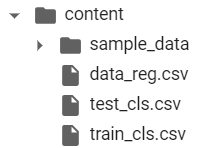

In [127]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from sklearn.exceptions import FitFailedWarning
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import Ridge
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_regression

Question one:
1. Read the data from the csv file and split it into training set (the first 120 examples), validation set (the next 40 examples), and testing set (the last 40 examples). Plot the examples from the three sets in a scatter plot (each set encoded with a different color). Note that the plot here will be 3D plot where the x and y axes represent the x1 and x2 features, whereas the z-axis is the target label y.


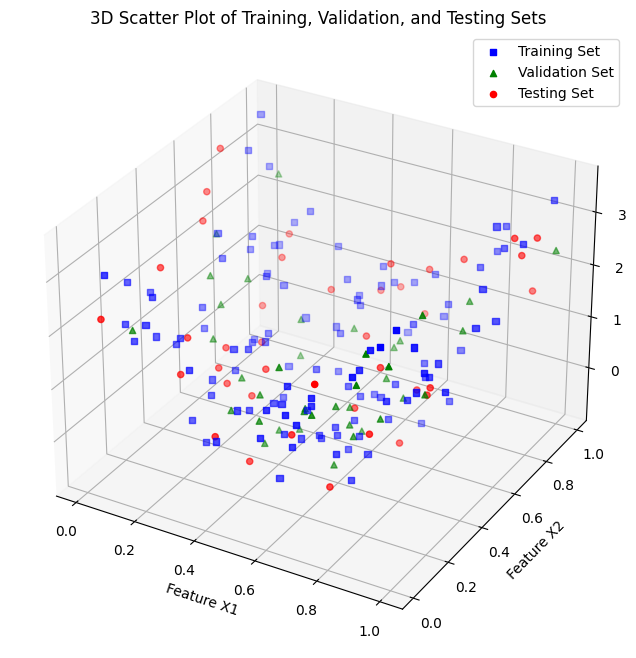

In [172]:
# Read the data from the csv file
dataReg_csv = pd.read_csv('data_reg.csv')

# Splitting the data into 120 examples of training, 40 examples of validation, and  40 examples of testing sets
training_set = dataReg_csv.iloc[:120]
validation_set = dataReg_csv.iloc[120:160]
testing_set = dataReg_csv.iloc[160:]

# Creating a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting the examples from the three sets in a scatter plot (each set encoded with a different color)

# Plot the examples from the training set
ax.scatter(training_set['x1'], training_set['x2'], training_set['y'], c='blue', marker='s', label='Training Set')

# Plot the examples from the Validation set
ax.scatter(validation_set['x1'], validation_set['x2'], validation_set['y'], c='green', marker='^', label='Validation Set')

# Plot the examples from the training set
ax.scatter(testing_set['x1'], testing_set['x2'], testing_set['y'], c='red', marker='o', label='Testing Set')

# Labeling axes and setting title
ax.set_xlabel('Feature X1')
ax.set_ylabel('Feature X2')
ax.set_zlabel('Target Label Y')
ax.set_title('3D Scatter Plot of Training, Validation, and Testing Sets')

# Adding a legend
ax.legend()

# Display the plot
plt.show()


- Our data set's 3D scatter plot displays data points from the test, validation, and training sets, each is indicated with a different color. The training set's closely spaced data points show the intricate patterns that our model must discover. The same distribution of the test and validation sets shows how generalizable the model is. Potential clusters and outliers are also displayed on the plot, highlighting regions where the model may learn rapidly or where it may need to put in more effort to get precise predictions.

2. Apply polynomial regression on the training set with degrees in the range of 1 to 10. Which polynomial degree is the best? Justify your answer by plotting the validation error vs polynomial degree curve. For each model plot the surface of the learned function alongside with the training examples on the same plot.(hint: you can use PolynomialFeatures and LinearRegression from
scikit-learn library)


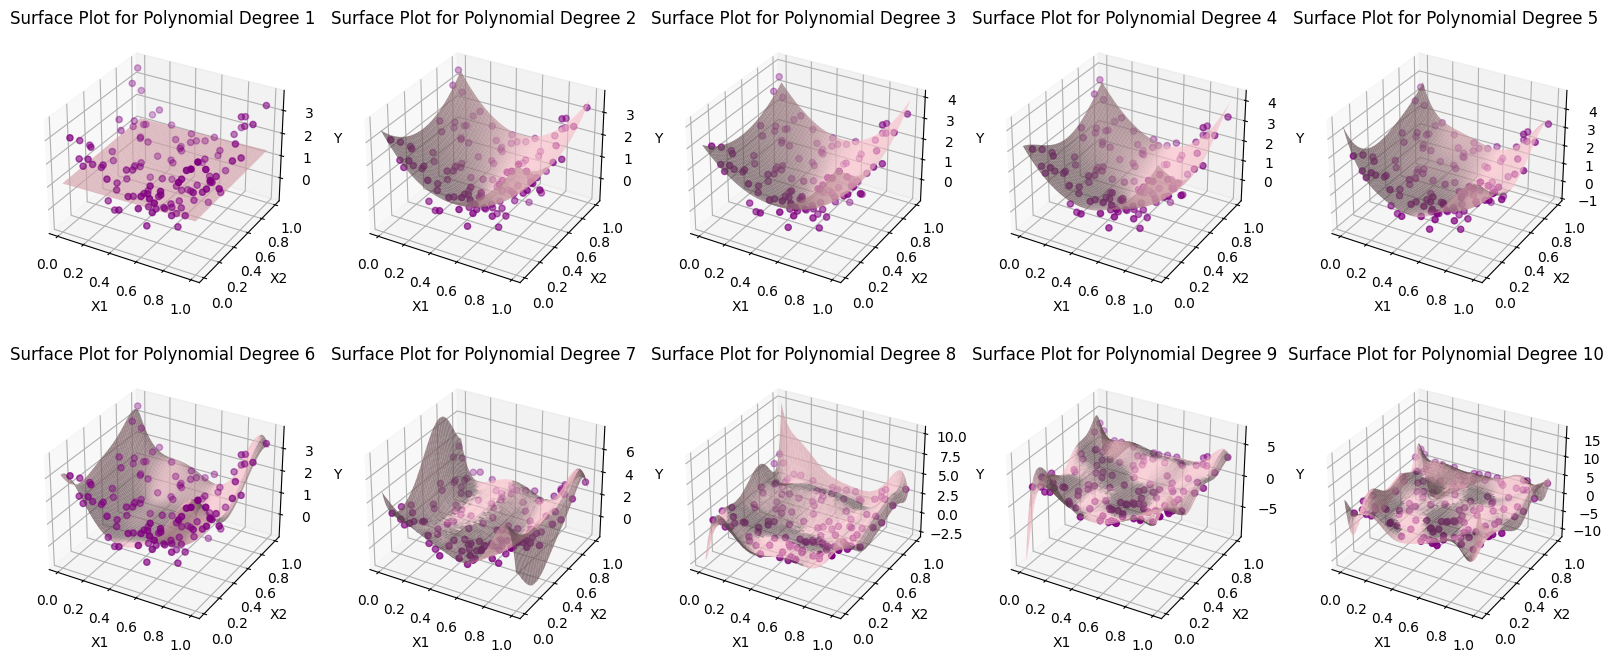

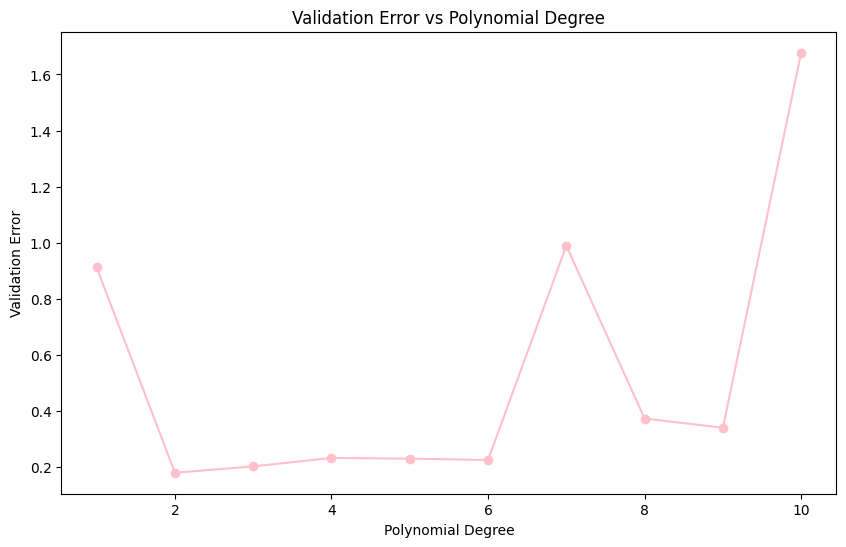

Model Degree 1: Validation Error = 0.9118, Model: LinearRegression()
Model Degree 2: Validation Error = 0.1799, Model: LinearRegression()
Model Degree 3: Validation Error = 0.2024, Model: LinearRegression()
Model Degree 4: Validation Error = 0.2327, Model: LinearRegression()
Model Degree 5: Validation Error = 0.2300, Model: LinearRegression()
Model Degree 6: Validation Error = 0.2254, Model: LinearRegression()
Model Degree 7: Validation Error = 0.9890, Model: LinearRegression()
Model Degree 8: Validation Error = 0.3731, Model: LinearRegression()
Model Degree 9: Validation Error = 0.3404, Model: LinearRegression()
Model Degree 10: Validation Error = 1.6775, Model: LinearRegression()
The best Model Degree 2: With Validation Error = 0.1799


In [129]:
warnings.filterwarnings("ignore")

validation_errors = []
models = []

# Get the training data
training_X = training_set[['x1', 'x2']] # from Feature 1 & 2
training_Y = training_set['y']

# Get the validation data
validation_X = validation_set[['x1', 'x2']] # from Feature 1 & 2
validation_Y = validation_set['y']

# Decide how many points the grid should have in each dimension.
numOfpoints = 100

# Determine the number of rows for the subplot grid
total_plots = 10  # Assuming you have 10 models
plots_per_line = 5
rows = np.ceil(total_plots / plots_per_line).astype(int)

# Create a figure with multiple subplots
fig, axs = plt.subplots(rows, plots_per_line, figsize=(20, 4 * rows), subplot_kw={'projection': '3d'})

# Apply polynomial regression on the training set with degrees in the range of 1 to 10.
for degree in range(1, 11):

    # Create polynomial features
    polynomialFeatures = PolynomialFeatures(degree)

    # Convert the polynomial features into the training feature matrix.
    polynomial_training_X = polynomialFeatures.fit_transform(training_X)

    # Convert the polynomial features into the validation feature matrix.
    polynomial_validation_X = polynomialFeatures.transform(validation_X)

    # Create a Linear Regression model
    model = LinearRegression()

    # Use polynomial features to train the model on the training set.
    model.fit(polynomial_training_X, training_Y)

    # Predict on validation set
    prediction_validation_Y = model.predict(polynomial_validation_X)

    #  Calculate error
    error = mean_squared_error(validation_Y, prediction_validation_Y)

    # Append the errors into validation_errors matrix
    validation_errors.append(error)

    # Store the trained model into models matrix
    models.append(model)

    # For the current subplot, find the matching row and column.
    row = (degree - 1) // plots_per_line
    col = (degree - 1) % plots_per_line

    # Access the correct subplot axes
    ax = axs[row, col]

    # Based on the minimum and maximum values found in the training set, create ranges for every feature.
    RangeOfX1 = np.linspace(training_X['x1'].min(), training_X['x1'].max(), numOfpoints)
    RangeOfX2 = np.linspace(training_X['x2'].min(), training_X['x2'].max(), numOfpoints)

    # Provide two 2D grids with the axes "x1" and "x2" in them.
    x1_grid, x2_grid = np.meshgrid(RangeOfX1, RangeOfX2)

    # Flatten grids into a 2D array (X_grid).
    X_grid = np.c_[x1_grid.ravel(), x2_grid.ravel()]

    # Transform the grid using the polynomial features
    polynomial_X_grid = polynomialFeatures.transform(X_grid)

    # Predict on grid
    z_grid_pred = model.predict(polynomial_X_grid).reshape(x1_grid.shape)

    # Plot the surface
    ax.plot_surface(x1_grid, x2_grid, z_grid_pred, alpha=0.7, color='pink')

    # Plot the training data
    ax.scatter(training_X['x1'], training_X['x2'], training_Y, c='purple', marker='o')

    # Set the labels and the title for the subplot
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('Y')
    ax.set_title(f'Surface Plot for Polynomial Degree {degree}')

plt.show()

# Identify the best degree
best_degree = np.argmin(validation_errors) + 1
best_model = models[best_degree - 1]

# Plot the validation error vs polynomial degree curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), validation_errors, marker='o', c='pink')
plt.xlabel('Polynomial Degree')
plt.ylabel('Validation Error')
plt.title('Validation Error vs Polynomial Degree')
plt.show()

# Print the models with thier validation errors
for degree, (error, model) in enumerate(zip(validation_errors, models)):
    print(f"Model Degree {degree+1}: Validation Error = {error:.4f}, Model: {model}")

# Print the best model degree
best_model_output = f"The best Model Degree {best_degree}: With Validation Error = {validation_errors[best_degree - 1]:.4f}"
print(best_model_output)

- The polynomial regression analysis results indicate that a quadratic model is most suitable for capturing the relationship between features and target variables without overfitting or underfitting. The lowest point on the validation error plot corresponds to the polynomial degree that achieves the lowest error, which is at degree 2, with a validation error of approximately 0.1799. As the polynomial degree increases beyond 2, the validation error tends to increase, with fluctuations. Degrees 7 and 10 have higher errors, which could be indicative of overfitting. For every polynomial degree, according to 3D surface plots, the model fits the training data well. However, as the degree goes up.

3. Apply ridge regression on the training set to fit a polynomial of degree 8. For the regularization parameter, choose the best value among the following
options: {0.001, 0.005, 0.01, 0.1, 10}. Plot the MSE on the validation vs the
regularization parameter.(hint: you can use Ridge regression implementation from scikit-learn

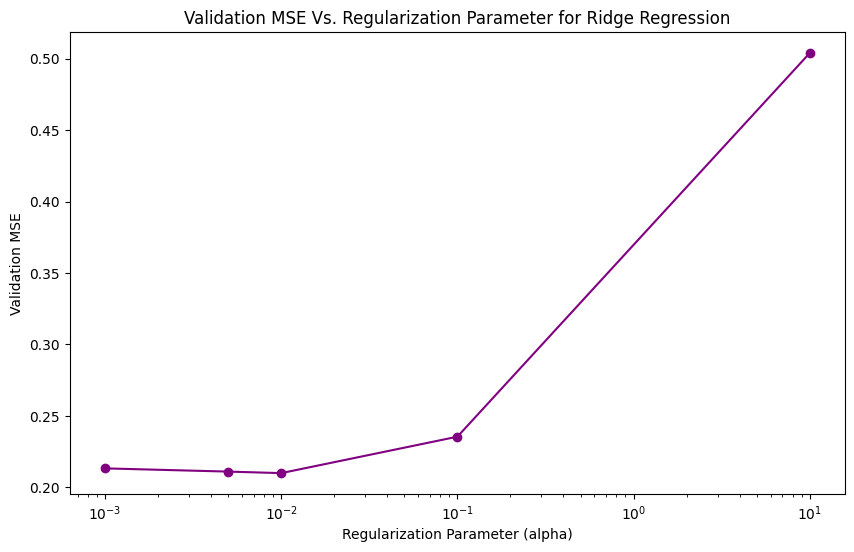

Regularization Parameter (alpha) 0.001: Validation MSE = 0.2133, Model: Ridge(alpha=0.001)
Regularization Parameter (alpha) 0.005: Validation MSE = 0.2110, Model: Ridge(alpha=0.005)
Regularization Parameter (alpha) 0.01: Validation MSE = 0.2100, Model: Ridge(alpha=0.01)
Regularization Parameter (alpha) 0.1: Validation MSE = 0.2355, Model: Ridge(alpha=0.1)
Regularization Parameter (alpha) 10: Validation MSE = 0.5038, Model: Ridge(alpha=10)


Best Regularization Parameter (alpha): 0.01, Validation MSE: 0.2100, Model: Ridge(alpha=0.01)


In [132]:
# Polynomial degree
degree = 8

# # Lists for ridge models and validation MSEs
validation_mse = []
ridge_models = []

# Polynomial degree
degree = 8

# Testable regularization parameters
regularization_params = [0.001, 0.005, 0.01, 0.1, 10]

# Create polynomial features
polynomialFeatures = PolynomialFeatures(degree)

# Convert the polynomial features into the training feature matrix.
polynomial_training_x = polynomialFeatures.fit_transform(training_X)

# Convert the polynomial features into the validation feature matrix.
polynomial_validation_X = polynomialFeatures.transform(validation_X)

# Apply various regularization parameters while using Ridge regression.
for alpha in regularization_params:

    #Build a Ridge Regression Model using the given alpha.
    ridge_model = Ridge(alpha=alpha)

    # Use polynomial features to fit the Ridge model to the training set of data.
    ridge_model.fit(polynomial_training_x, training_Y)

    # Make a prediction using the validation set, then calculat the MSE.
    targit_validation_prediction = ridge_model.predict(polynomial_validation_X)
    mse = mean_squared_error(validation_Y, targit_validation_prediction)

    # Append the MSE value into validation_mse matrix
    validation_mse.append(mse)

    # Store the trained model into ridge_models matrix
    ridge_models.append(ridge_model)

# Locate the alpha value index that yields the lowest validation. MSE
indexOfBestAlpha = np.argmin(validation_mse)

# Obtain the associated optimal alpha value from the regularization_params list.
best_alpha = regularization_params[indexOfBestAlpha]

#  Select the one with the best alpha from the list of ridge models.
best_ridge_model = ridge_models[indexOfBestAlpha]

# Get the corresponding MSE for the best alpha
best_mse = validation_mse[indexOfBestAlpha]

# Plot MSE on validation vs regularization parameter
plt.figure(figsize=(10, 6))
plt.plot(regularization_params, validation_mse, marker='o', c='purple')
plt.xlabel('Regularization Parameter (alpha)')
plt.ylabel('Validation MSE')
plt.title('Validation MSE Vs. Regularization Parameter for Ridge Regression')
plt.xscale('log')  # Since the regularization parameters vary in orders of magnitude
plt.show()

# Return the ridge models together with their related MSEs (the relevant MSEs are included in 'validation_mse)'.
for alpha, (model, mse) in zip(regularization_params, zip(ridge_models, validation_mse)):
    print(f"Regularization Parameter (alpha) {alpha}: Validation MSE = {mse:.4f}, Model: {model}")

# Assuming 'best_alpha', 'best_mse', and 'best_ridge_model' are obtained
print(f"\n\nBest Regularization Parameter (alpha): {best_alpha}, Validation MSE: {best_mse:.4f}, Model: {best_ridge_model}")

- The regularization parameter (alpha) significantly impacts the performance of Ridge Regression in terms of Mean Squared Error (MSE) on the validation set. Low alpha values indicate better fit, suggesting that less regularization allows the model to fit the data more closely. The optimal alpha value is achieved at alpha = 0.01, minimizing error on the validation data. However, higher alpha values can lead to underfitting, as the model becomes too simple and cannot capture the data structure, resulting in higher errors.

**Logistic Regression**


Question two:
  1.  using the logistic regression implementation of scikit-learn library, Learn
a logistic regression model with a linear decision boundary. Draw the decision
boundary of the learned model on a scatterplot of the training set (similar to
Figure 1). Compute the training and testing accuracy of the learned model.

Training Accuracy: 66.13%
Testing Accuracy: 68.18%


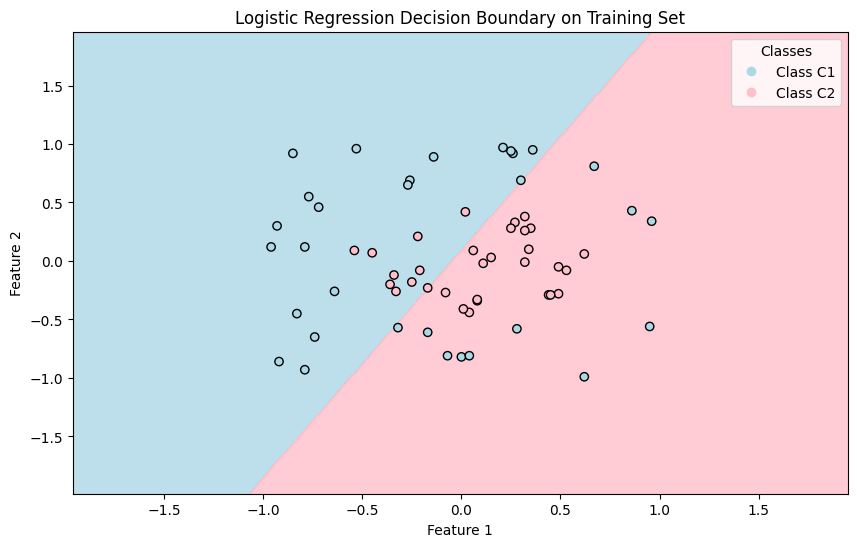

In [168]:
warnings.filterwarnings("ignore")

# Load the training and testing data
train_data = pd.read_csv('train_cls.csv')
test_data = pd.read_csv('test_cls.csv')

# Mapping class labels to numerical values
class_mapping = {'C1': 0, 'C2': 1}
train_data['class'] = train_data['class'].map(class_mapping)
test_data['class'] = test_data['class'].map(class_mapping)

# Separate features and target label for training
training_X = train_data[['x1', 'x2']]
training_Y = train_data['class']

# Separate features and target label for testing
testing_X = test_data[['x1', 'x2']]
testing_Y = test_data['class']

# Make a logistic regression model and train it.
logistic_regression = LogisticRegression()
logistic_regression.fit(training_X, training_Y)

# Compute the training and testing accuracy
training_accuracy = accuracy_score(training_Y, logistic_regression.predict(training_X))
testing_accuracy = accuracy_score(testing_Y, logistic_regression.predict(testing_X))

# Print the accuracies
print(f"Training Accuracy: {training_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {testing_accuracy * 100:.2f}%")

# Using the 'x1' feature in the training data, define the x-axis's minimum and maximum values.
x_min, x_max = training_X['x1'].min() - 1, training_X['x1'].max() + 1

# Using the 'x2' feature in the training data, define the y-axis's minimum and maximum values.
y_min, y_max = training_X['x2'].min() - 1, training_X['x2'].max() + 1

# Create a grid of x ans y values with a 0.01 step size.
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict class probabilities for each point on the mesh
Z = logistic_regression.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Define colors
cmap = ListedColormap(['lightblue', 'pink'])

# Plotting
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap)
scatter = plt.scatter(training_X['x1'], training_X['x2'], c=training_Y, edgecolors='k', cmap=cmap)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary on Training Set')

legend = plt.legend(*scatter.legend_elements(), title="Classes")
legend.get_texts()[0].set_text('Class C1')
legend.get_texts()[1].set_text('Class C2')

plt.show()

- The figure depicts a logistic regression classifier that was trained to distinguish between two classes. The pink and blue areas are divided by a line, which represents the linear decision boundary. The model demonstrates a strong match with the data. The accuracy ratings of the model, which are 68.18% for testing and 66.13% for training, show that the model performs consistently on both known and unknown data.

2. Repeat part 1 but now to learn a logistic regression model with quadratic
decision boundary.

Training Accuracy: 96.77%
Testing Accuracy: 95.45%


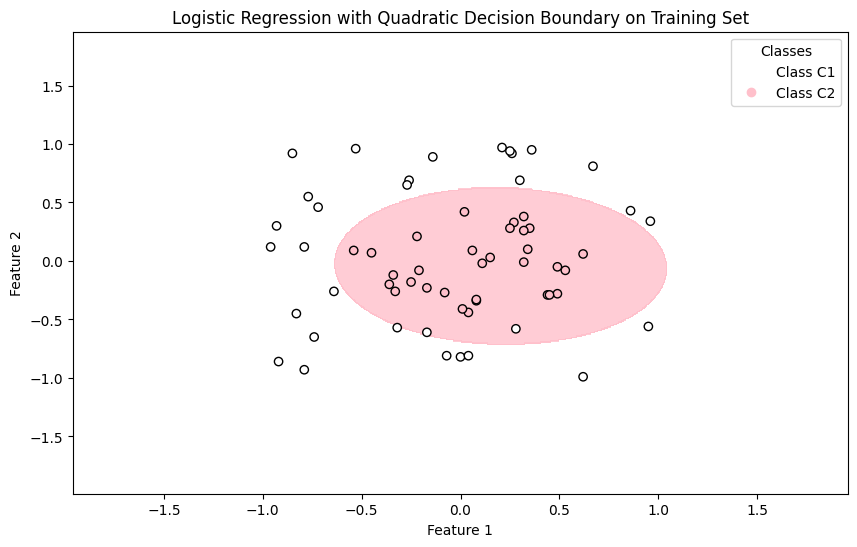

In [170]:
# Load the training and testing data
train_data = pd.read_csv('train_cls.csv')
test_data = pd.read_csv('test_cls.csv')

# Mapping class labels to numerical values
class_mapping = {'C1': 0, 'C2': 1}
train_data['class'] = train_data['class'].map(class_mapping)
test_data['class'] = test_data['class'].map(class_mapping)

# Separate features and target label for training
training_X = train_data[['x1', 'x2']]
training_Y = train_data['class']

# Separate features and target label for testing
testing_X = test_data[['x1', 'x2']]
testing_Y = test_data['class']

# Transforming features to polynomial features
poly = PolynomialFeatures(degree=2)
training_X_poly = poly.fit_transform(training_X)
testing_X_poly = poly.transform(testing_X)

# Make a logistic regression model and train it on polynomial features.
logistic_regression_poly = LogisticRegression()
logistic_regression_poly.fit(training_X_poly, training_Y)

# Compute the training and testing accuracy for polynomial model
training_accuracy_poly = accuracy_score(training_Y, logistic_regression_poly.predict(training_X_poly))
testing_accuracy_poly = accuracy_score(testing_Y, logistic_regression_poly.predict(testing_X_poly))

# Print the accuracies
print(f"Training Accuracy: {training_accuracy_poly * 100:.2f}%")
print(f"Testing Accuracy: {testing_accuracy_poly * 100:.2f}%")

# Using the 'x1' and 'x2' features in the training data, define the grid's range.
x_min, x_max = training_X['x1'].min() - 1, training_X['x1'].max() + 1
y_min, y_max = training_X['x2'].min() - 1, training_X['x2'].max() + 1

# Make a grid with x and y values and a step size of 0.001 (alpha).
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.001), np.arange(y_min, y_max, 0.01))

# Use a polynomial model to predict the class probabilities for each point on the mesh.
Z_polynomial = logistic_regression_poly.predict(poly.transform(np.c_[xx.ravel(), yy.ravel()]))
Z_polynomial = Z_polynomial.reshape(xx.shape)

# Define colors
cmap_custom = ListedColormap(['white', 'pink'])

# Plotting
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z_polynomial, alpha=0.8, cmap=cmap_custom)
scatter = plt.scatter(training_X['x1'], training_X['x2'], c=training_Y, edgecolors='k', cmap=cmap_custom)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression with Quadratic Decision Boundary on Training Set')
legend = plt.legend(*scatter.legend_elements(), title="Classes")
legend.get_texts()[0].set_text('Class C1')
legend.get_texts()[1].set_text('Class C2')

plt.show()



- The logistic regression model with a quadratic decision boundary has achieved high accuracy in training and testing data, with a 96.77% training accuracy and 95.45% testing accuracy. This non-linear decision boundary captures complex patterns in non-linear data, making it a suitable choice for robust predictive performance.

3.  Comment on the learned models in 1 and 2 in terms of overfitting/underfitting

- High training and testing accuracy indicates a good model fit for the data and good generalization to unseen data. If training accuracy is higher than testing accuracy, it may indicate overfitting, where the model is too tailored to the training data and not performs well on new data. Low accuracies may indicate underfitting, where the model is too simplistic and fails to capture the underlying pattern. High training and testing accuracy may indicate issues with the model's evaluation or a small test set.